In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

In [2]:
import glob
import os
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
all_data  = pd.DataFrame()
for file_name in glob.glob('archive/Data/Set-2/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False, on_bad_lines='skip')
    x['Hashtag'] = file_name[file_name.find('\\')+1:file_name.find('.')]
    all_data = pd.concat([all_data,x],axis=0)

In [4]:
all_data.reset_index(inplace=True)
## Due to the nature of some of the text compoments, they must be skipped as the parser has issues in reading in
## some specific lines, overall I don't think this is a large detrimnet

In [5]:
all_data

,index,sentiment,text,user,Hashtag
0,0,neutral,Michael Parenti. \To Kill a Nation: The Attack...,juristnaprovode,NATO
1,1,positive,RT @VanberghenEU: 100 days of war in #Ukraine ...,VanberghenEU,NATO
2,2,neutral,RT @EU_today: Meet the crew of the Spanish sub...,EU_today,NATO
3,3,neutral,RT @radio3mondo: Il podcast della rassegna sta...,CostanzaSpocci,NATO
4,4,positive,RT @jensstoltenberg: Great to meet with Prime ...,jonathankrico,NATO
...,...,...,...,...,...
1183,89,neutral,RT @GiovaQuez: Salvini: \Se aspettiamo il Pd o...,RobertoRenga,ukrainewar
1184,90,negative,RT @anonukops: #Anonymous Releases a terabyte ...,ivanofarsky,ukrainewar
1185,91,neutral,RT @ILhamilhm3: As the world focuses the #Ukra...,Gheralta_rimey,ukrainewar
1186,92,positive,@Cero_On3 @DoomSec_ has a #TangoDown on rosree...,KrazyKaoticMess,ukrainewar


In [6]:
### Text preprocessing
all_data['text']

0       Michael Parenti. \To Kill a Nation: The Attack...
1       RT @VanberghenEU: 100 days of war in #Ukraine ...
2       RT @EU_today: Meet the crew of the Spanish sub...
3       RT @radio3mondo: Il podcast della rassegna sta...
4       RT @jensstoltenberg: Great to meet with Prime ...
                              ...                        
1183    RT @GiovaQuez: Salvini: \Se aspettiamo il Pd o...
1184    RT @anonukops: #Anonymous Releases a terabyte ...
1185    RT @ILhamilhm3: As the world focuses the #Ukra...
1186    @Cero_On3 @DoomSec_ has a #TangoDown on rosree...
1187    RT @gahamalian: The Soyuz-2.1a rocket was laun...
Name: text, Length: 1188, dtype: object

In [7]:
testing = all_data['text'][1]
testing

'RT @VanberghenEU: 100 days of war in #Ukraine and the question is how long will Ukraine and the whole world resist? Thinking long term... t…'

In [8]:
ellipsis_char = all_data['text'][1][-1]
ellipsis_char

'…'

In [9]:
all_data['text'][100]

'RT @Piotr39_C: Отже, війна! [анімація] 🇺🇦#Ukraine\\n\\n#HelpUkraine #FreeUkraine #Украина #UkraineWar #UkraineRussianWar #PutinsWar #UkraineUnd…'

In [10]:
def filter_seq(text_list):
    ret_list = []
    for i in text_list:
        a = " ".join(filter(lambda x:x[0]!='#', i.split()))
        b = ' '.join(filter(lambda x:x[0]!='@', a.split()))
        c = ' '.join(filter(lambda x:x[-1]!='.', b.split()))
        d = ' '.join(filter(lambda x:x[-1]!=ellipsis_char, c.split()))
        ret_list.append(d)
    return(ret_list)

In [11]:
def tokenize(txt_bodies):
    word_tokens_list = []
    for i in txt_bodies:
        word_tokens_list.append(nltk.word_tokenize(i))
    return word_tokens_list

In [12]:
def regex_clean(word_tokens_list, expr = "[^\w\s]"):
    clean_data_list = []
    for word_tokens in word_tokens_list:
        clean_data = []
        for words in word_tokens:
            item = []
            result = re.sub(expr, "", words)
            if result != "":
                clean_data.append(result)
        clean_data_list.append(clean_data)
    return clean_data_list

In [13]:
def stopwords_clean(clean_data_list):
    cleaner_data_list = []
    for clean_data in clean_data_list:
        cleaner_data = []
        for words in clean_data:
            if not words in stopwords.words('english'):
                if not words in ['http']:
                    cleaner_data.append(words)
        cleaner_data_list.append(cleaner_data)
    return cleaner_data_list

In [14]:
def lemmatizer_clean(cleaner_data_list):
    lemmer = nltk.stem.WordNetLemmatizer()
    lemm_data_list = []
    for cleaner_data in cleaner_data_list:
        lemm_data = []
        for word in cleaner_data:
            lemm_data.append(lemmer.lemmatize(word))
        lemm_data_list.append(lemm_data)
    return lemm_data_list


In [15]:
def list_concat(lemm_data_list):
    new_list = []
    for i in lemm_data_list:
        new_list.append(' '.join(i[4:]))
    return new_list

In [16]:
filtered_tweets = filter_seq(all_data['text'])
words_tokens_list = tokenize(filtered_tweets)
clean_data_list = regex_clean(words_tokens_list)
cleaner_data_list = stopwords_clean(clean_data_list)
lemm_data_list = lemmatizer_clean(cleaner_data_list)
final_list = list_concat(lemm_data_list)
final_list[0]

'The Attack Yugoslavia 2000 nn Politics http tco9xjbBIje1x'

In [17]:
final_list

['The Attack Yugoslavia 2000 nn Politics http tco9xjbBIje1x',
 'question long Ukraine whole world resist Thinking long',
 'submarine ESPS Mistral embark mission Allied submarine key',
 'rassegna stampa internazionale di con n Grano',
 'Minister close partner We discussed need',
 'could easily drag unresolved conflict neither side http tcoGX44H1Z5tv',
 'Minister close partner We discussed need',
 'Minister close partner We discussed need',
 'big club nand itnn NATO http tco03LgOACXbq',
 'कय यकरन झकग nn anjali_speak http tcou6Vvk4KyMa',
 'för proxystyrkor Turkiet använder Syrien egentligen nnJo krigare kopplade till alQaida och ISnnSka Sverige',
 'soldier deploying pontoon bridge part military',
 'और इजरयल क यतर टलnn anjali_speak http tcosbWdgsic4R',
 'e italiane mentre promette altri aiuti http tcoJQ65c8lwEi',
 'table visit knw us coffee table http tco7nkJIkOqip',
 'बढन म जट चनnn anjali_speak http tcorOEdvRv2xc',
 'Air Forces visited Air CommandnnThe Generals discussed Finland Sweden NA

In [18]:
len(final_list)

1188

In [19]:
final_list[1]

'question long Ukraine whole world resist Thinking long'

In [20]:
all_data['text'][0]

'Michael Parenti. \\To Kill a Nation: The Attack on Yugoslavia\\" (2000)\\n\\n#Politics #International #NATO #Kosovo #War… https://t.co/9xjbBIje1x"'

In [21]:
final_list[0]

'The Attack Yugoslavia 2000 nn Politics http tco9xjbBIje1x'

In [22]:
a = re.sub('tco\w+', '', final_list[0])
a

'The Attack Yugoslavia 2000 nn Politics http '

In [23]:
def link_removal(final_list):
    final_text = []
    for i in final_list:
        a = re.sub('tco\w+', '', i)
        b = re.sub('http', '', a)
        final_text.append(b)
    return final_text

In [24]:
final_text = link_removal(final_list)

In [25]:
final_text

['The Attack Yugoslavia 2000 nn Politics  ',
 'question long Ukraine whole world resist Thinking long',
 'submarine ESPS Mistral embark mission Allied submarine key',
 'rassegna stampa internazionale di con n Grano',
 'Minister close partner We discussed need',
 'could easily drag unresolved conflict neither side  ',
 'Minister close partner We discussed need',
 'Minister close partner We discussed need',
 'big club nand itnn NATO  ',
 'कय यकरन झकग nn anjali_speak  ',
 'för proxystyrkor Turkiet använder Syrien egentligen nnJo krigare kopplade till alQaida och ISnnSka Sverige',
 'soldier deploying pontoon bridge part military',
 'और इजरयल क यतर टलnn anjali_speak  ',
 'e italiane mentre promette altri aiuti  ',
 'table visit knw us coffee table  ',
 'बढन म जट चनnn anjali_speak  ',
 'Air Forces visited Air CommandnnThe Generals discussed Finland Sweden NATO',
 'die solle nicht davor  ',
 'divide rule method pose lifethreatening danger humankind chinadail',
 'Verkaufsveranstaltung für US E

In [26]:
final_data = all_data
final_data['text'] = final_text
final_data.head()

,index,sentiment,text,user,Hashtag
0,0,neutral,The Attack Yugoslavia 2000 nn Politics,juristnaprovode,NATO
1,1,positive,question long Ukraine whole world resist Think...,VanberghenEU,NATO
2,2,neutral,submarine ESPS Mistral embark mission Allied s...,EU_today,NATO
3,3,neutral,rassegna stampa internazionale di con n Grano,CostanzaSpocci,NATO
4,4,positive,Minister close partner We discussed need,jonathankrico,NATO


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [28]:
train, test = train_test_split(final_data, test_size=0.2)

In [29]:
vec = CountVectorizer(ngram_range = (1, 3), stop_words = 'english')

In [30]:
X_train = vec.fit_transform(train.text)
X_test = vec.transform(test.text)

y_train = train.sentiment
y_test = test.sentiment

In [31]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', random_state = 123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.8277310924369747

In [33]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = None,
                             bootstrap = True, random_state = 123, verbose = 2)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_y_pred)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


0.8361344537815126

In [34]:
rfc.estimators_[0]

DecisionTreeClassifier(criterion='entropy', random_state=843828734)

In [35]:
from sklearn import tree

[Text(0.9931856899488927, 0.9982014388489209, 'X[4140] <= 0.5\nentropy = 1.213\nsamples = 950\nvalue = [129, 649, 172]'),
 Text(0.989778534923339, 0.9946043165467626, 'X[4208] <= 0.5\nentropy = 1.147\nsamples = 917\nvalue = [96, 649, 172]'),
 Text(0.9863713798977853, 0.9910071942446043, 'X[82] <= 0.5\nentropy = 1.135\nsamples = 909\nvalue = [96, 649, 164]'),
 Text(0.9829642248722317, 0.987410071942446, 'X[2506] <= 0.5\nentropy = 1.093\nsamples = 892\nvalue = [79, 649, 164]'),
 Text(0.979557069846678, 0.9838129496402878, 'X[1120] <= 0.5\nentropy = 1.08\nsamples = 884\nvalue = [79, 649, 156]'),
 Text(0.9761499148211243, 0.9802158273381295, 'X[3687] <= 0.5\nentropy = 1.111\nsamples = 843\nvalue = [79, 608, 156]'),
 Text(0.9727427597955707, 0.9766187050359713, 'X[3402] <= 0.5\nentropy = 1.098\nsamples = 835\nvalue = [79, 608, 148]'),
 Text(0.969335604770017, 0.9730215827338129, 'X[669] <= 0.5\nentropy = 1.089\nsamples = 832\nvalue = [76, 608, 148]'),
 Text(0.9625212947189097, 0.96942446043

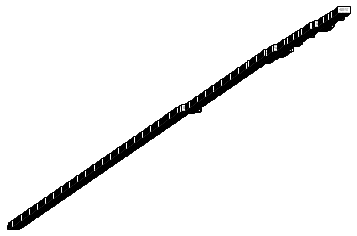

In [36]:
tree.plot_tree(clf)

In [37]:
# fig = plt.figure(figsize = (25,20))
# _ = tree.plot_tree(clf, class_names = train.sentiment, filled=True)

In [38]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(final_text, size))

In [39]:
all_counts[5].most_common(5)

[(('sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part'),
  33),
 (('', '', '', '', ''), 5),
 (('sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine close coast west This part',
   'large landing ship assembled 3 fleet Navy left Black Sea according',
   'sign Navy clearing mine close coast west This part'),
  4),
 (('wife mother ruined He lost eye spent month ruined',
   'wife mother ruined He lost eye spent month ruined',
   'wife mother ruined He lost eye spent month ruined',
   'wife mother ruined He lost eye spent month ruined',
   'wife mother ruined He lost eye spent month ruined'),
  4),
 (('sign Navy clearing mine close coast west This part',
   'sign Navy clearing mine

In [40]:
fdist = FreqDist(word.lower() for word in final_text)

In [41]:
fdist

FreqDist({'': 136, 'sign navy clearing mine close coast west this part': 83, ' ': 50, 'wife mother ruined he lost eye spent month ruined': 45, 'family ethiopia face remain': 45, 'agricultural enterprise odesa region cruise two': 44, 'suffering families get wiped 261 kid 463 these': 19, 'minister close partner we discussed need': 11, 'captured now part zmachine russianarmy  ': 10, 'terrorist escalate repression occupied': 10, ...})

C:\Users\du_ja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\du_ja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\du_ja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\du_ja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\du_ja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\du_ja\anaconda3

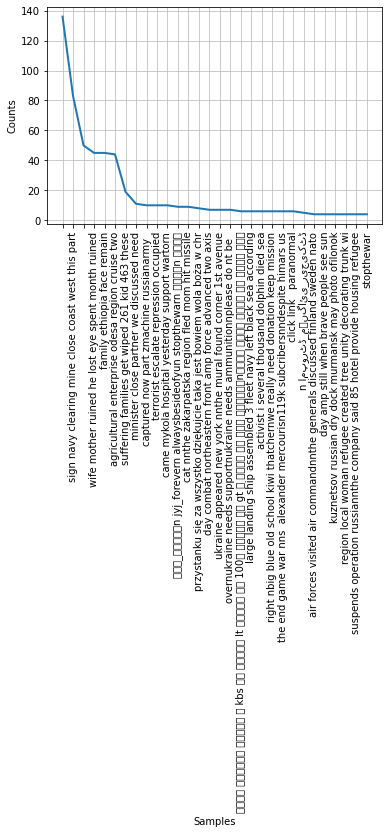

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
fdist.plot(30,cumulative=False)


In [43]:
label_1, counts_1 =  np.unique(final_data.sentiment, return_counts = True)

Text(0.5, 1.0, 'Number of Counts per Sentiment Rating')

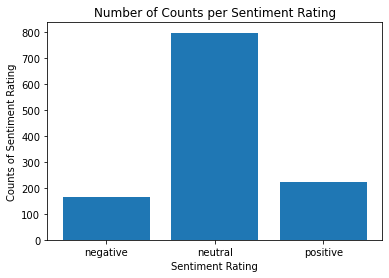

In [44]:
## Visualizing the new training dataset
fig, ax = plt.subplots()
ax.bar(label_1, counts_1)
ax.set_xlabel('Sentiment Rating')
ax.set_ylabel('Counts of Sentiment Rating')
ax.set_title('Number of Counts per Sentiment Rating')

## Now we can see that we have a dataset with equal labels in all categories.

In [45]:
label_1, counts_1

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([166, 798, 224], dtype=int64))

In [46]:
negative_data = final_data[final_data['sentiment']=='negative']
neutral_data = final_data[final_data['sentiment'] == 'neutral']
positive_data = final_data[final_data['sentiment'] == 'positive']

In [47]:
neg_text, _ = np.unique(negative_data.text, return_counts = True)
neu_text, _ = np.unique(neutral_data.text, return_counts = True)
pos_text, _ = np.unique(positive_data.text, return_counts = True)

In [48]:
print(len(neu_text), len(neg_text), len(pos_text))

354 82 130


In [49]:
min_len = max(len(neu_text), len(neg_text), len(pos_text))

In [50]:
from imblearn.over_sampling import SMOTE 

In [51]:
# neg_samp = random.sample(list(neg_text), min_len)
# neu_samp = random.sample(list(neu_text), min_len)
# pos_samp = random.sample(list(pos_text), min_len)

In [52]:
# len(neu_samp)

In [53]:
# neg_df = pd.DataFrame(neg_samp)
# neg_df['sentiment'] = 'negative'
# neu_df = pd.DataFrame(neu_samp)
# neu_df['sentiment'] = 'neutral'
# pos_df = pd.DataFrame(pos_samp)
# pos_df['sentiment'] = 'positive'

In [54]:
# good_df = pd.concat([neg_df, neu_df, pos_df])

In [55]:
# good_df.rename(columns = {0: 'text'}, inplace = True)

In [56]:
neg_df1 = pd.DataFrame(neg_text)
neg_df1['sentiment'] = 'negative'
neu_df1 = pd.DataFrame(neu_text)
neu_df1['sentiment'] = 'neutral'
pos_df1 = pd.DataFrame(pos_text)
pos_df1['sentiment'] = 'positive'

In [57]:
imb_df = pd.concat([neg_df1, neu_df1, pos_df1])

In [58]:
imb_df.rename(columns = {0: 'text'}, inplace = True)

In [59]:
train1, test1 = train_test_split(imb_df, test_size=0.2)

In [60]:
X_train1 = vec.fit_transform(train1.text)
X_test1 = vec.transform(test1.text)

y_train1 = train1.sentiment
y_test1 = test1.sentiment

In [61]:
sm = SMOTE(random_state = 123) 
X_train_res, y_train_res = sm.fit_resample(X_train1, y_train1) 

In [62]:
clf1 = DecisionTreeClassifier(criterion = 'gini', max_features = None, random_state = 123)
clf1.fit(X_train_res, y_train_res)
y_pred1 = clf1.predict(X_test1)

In [63]:
accuracy_score(y_test1, y_pred1)

0.40350877192982454

In [64]:
rfc1 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_features = 'sqrt',
                             bootstrap = True, random_state = 123, verbose = 2)
rfc1.fit(X_train_res, y_train_res)
rfc_y_pred1 = rfc1.predict(X_test1)
accuracy_score(y_test1, rfc_y_pred1)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.5s


building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.1s


building tree 736 of 1000
building tree 737 of 1000
building tree 738 of 1000
building tree 739 of 1000
building tree 740 of 1000
building tree 741 of 1000
building tree 742 of 1000
building tree 743 of 1000
building tree 744 of 1000
building tree 745 of 1000
building tree 746 of 1000
building tree 747 of 1000
building tree 748 of 1000
building tree 749 of 1000
building tree 750 of 1000
building tree 751 of 1000
building tree 752 of 1000
building tree 753 of 1000
building tree 754 of 1000
building tree 755 of 1000
building tree 756 of 1000
building tree 757 of 1000
building tree 758 of 1000
building tree 759 of 1000
building tree 760 of 1000
building tree 761 of 1000
building tree 762 of 1000
building tree 763 of 1000
building tree 764 of 1000
building tree 765 of 1000
building tree 766 of 1000
building tree 767 of 1000
building tree 768 of 1000
building tree 769 of 1000
building tree 770 of 1000
building tree 771 of 1000
building tree 772 of 1000
building tree 773 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


0.38596491228070173

In [65]:
from googletrans import Translator


In [66]:
translator = Translator()

In [67]:
translator.translate('estupido', dest = 'en').text

'idiot'

In [68]:
trans_txt = []
for text in imb_df['text']:
    trans_txt.append(translator.translate(text, dest = 'en').text)
imb_df['translated_text'] = trans_txt

In [69]:
imb_df.reset_index(inplace = True)

In [70]:
imb_df.shape

(566, 4)

In [71]:
imb_df.drop(columns = 'index', inplace=True)

In [72]:
imb_df

,text,sentiment,translated_text
0,0000 UTC,negative,0000 UTC
1,1945 flag raised nYet forced fight rising,negative,1945 flag raised nYet forced fight rising
2,331st Airborne Regiment killed n DeadRussianSo...,negative,331st Airborne Regiment killed in Dead Russian...
3,948ns russianATTACK,negative,948ns russianATTACK
4,American foreign policy Afghanistan Soviet Uni...,negative,American foreign policy Afghanistan Soviet Uni...
...,...,...,...
561,world silent going Lol nn Ukraine,positive,world silent going Lol nn Ukraine
562,year old fighting He one guarding footbridge K...,positive,year old fighting He one guarding footbridge K...
563,young Anyone left,positive,young Anyone left
564,über 80 Jahre alt und hat Gültigkeit nichts ei...,positive,over 80 years old and has lost nothing in vali...


In [73]:
stop_clean = []
for item in imb_df['translated_text']:
    my_words = item.split()
    cleaner_data = []
    for words in my_words:
        if not words in stopwords.words('english'):
            if not words in ['http']:
                cleaner_data.append(words)
    stop_clean.append(' '.join(cleaner_data))
stop_clean

['0000 UTC',
 '1945 flag raised nYet forced fight rising',
 '331st Airborne Regiment killed Dead Russian Soldiers',
 '948ns russianATTACK',
 'American foreign policy Afghanistan Soviet Union 40',
 'BMP2s Russian Not minute rest Russian',
 'DECLARED WAR ON THIS IS SO BAD via',
 'US country',
 'EUROCENTRISM SHAPES TODAY S PUTIN APPEASEMENT nnA long thread part',
 'East Tupolev Tu 154M Russian Air Force RA 85123',
 'Japan Russia potential default WORLDJAPAN Newsn News',
 'Kuznetsov Russian dry dock Murmansk May Photo OFilonok',
 'Lord please',
 'Putin Haitian Creole nn Putin War Crimes',
 'Putin Maltese nn Russian War Crimes',
 'Russia Unfortunately ca nt After one',
 'Russia Ukraine conflict quick sight russia',
 'Russian Not minute rest Russian',
 'RussianWarCrimes',
 'States destroyed ten thousand life An illegal war supported',
 'THE END GAME WAR nns Alexander Mercourisn119K subcribersnnDespite HIMARS US',
 'The Russian soldier vicious ugly The torture rape',
 'This video show Sievier

In [74]:
len(stop_clean)

566

In [75]:
imb_df['translated_text'] = stop_clean

In [76]:
imb_df

,text,sentiment,translated_text
0,0000 UTC,negative,0000 UTC
1,1945 flag raised nYet forced fight rising,negative,1945 flag raised nYet forced fight rising
2,331st Airborne Regiment killed n DeadRussianSo...,negative,331st Airborne Regiment killed Dead Russian So...
3,948ns russianATTACK,negative,948ns russianATTACK
4,American foreign policy Afghanistan Soviet Uni...,negative,American foreign policy Afghanistan Soviet Uni...
...,...,...,...
561,world silent going Lol nn Ukraine,positive,world silent going Lol nn Ukraine
562,year old fighting He one guarding footbridge K...,positive,year old fighting He one guarding footbridge K...
563,young Anyone left,positive,young Anyone left
564,über 80 Jahre alt und hat Gültigkeit nichts ei...,positive,80 years old lost nothing validity nIt today


In [77]:
df_0 = imb_df.drop(columns = 'text')

In [78]:
train0, test0 = train_test_split(df_0, test_size=0.2)

In [79]:
X_train0 = vec.fit_transform(train0.translated_text)
X_test0 = vec.transform(test0.translated_text)

y_train0 = train0.sentiment
y_test0 = test0.sentiment

In [80]:
sm0 = SMOTE(random_state = 123) 
X_train_res, y_train_res = sm0.fit_resample(X_train0, y_train0) 

In [81]:
y_train_res

0      positive
1      positive
2      positive
3       neutral
4       neutral
         ...   
850    positive
851    positive
852    positive
853    positive
854    positive
Name: sentiment, Length: 855, dtype: object

In [82]:
clf0 = DecisionTreeClassifier(criterion = 'gini', max_features = None, random_state = 123)
clf0.fit(X_train_res, y_train_res)
y_pred0 = clf0.predict(X_test0)
accuracy_score(y_test0, y_pred0)

0.4473684210526316

In [83]:
rfc0 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_features = 'sqrt',
                             bootstrap = True, random_state = 123, verbose = 2)
rfc0.fit(X_train_res, y_train_res)
rfc_y_pred0 = rfc0.predict(X_test0)
accuracy_score(y_test0, rfc_y_pred0)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.6s


building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.1s


building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000
building tree 714 of 1000
building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000
building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000
building tree 721 of 1000
building tree 722 of 1000
building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000
building tree 726 of 1000
building tree 727 of 1000
building tree 728 of 1000
building tree 729 of 1000
building tree 730 of 1000
building tree 731 of 1000
building tree 732 of 1000
building tree 733 of 1000
building tree 734 of 1000
building tree 735 of 1000
building tree 736 of 1000
building tree 737 of 1000
building tree 738 of 1000
building tree 739 of 1000
building tree 740 of 1000
building tree 741 of 1000
building tree 742 of 1000
building tree 743 of 1000
building tree 744 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


0.43859649122807015

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
cv = TfidfVectorizer(ngram_range=(1, 3))
tfidf = cv.fit_transform(df_0.translated_text)

In [86]:
tfidf_train, tfidf_test, sentiment_values_train, sentiment_values_test = train_test_split(tfidf, df_0.sentiment, test_size=0.20, random_state=123)

In [87]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [88]:
linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidf_train, sentiment_values_train)

predict = linear_svc.predict(tfidf_test)

In [89]:
report=classification_report(sentiment_values_test, predict,target_names=['Negative','Neutral', 'Positive'])
print("Classification Report: \n",report)

Classification Report: 
               precision    recall  f1-score   support

    Negative       1.00      0.19      0.32        16
     Neutral       0.63      1.00      0.77        70
    Positive       0.00      0.00      0.00        28

    accuracy                           0.64       114
   macro avg       0.54      0.40      0.36       114
weighted avg       0.53      0.64      0.52       114



C:\Users\du_ja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\du_ja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\du_ja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
matrix=confusion_matrix(sentiment_values_test, predict)
print("Confusion Matrix: \n",matrix)

Confusion Matrix: 
 [[ 3 13  0]
 [ 0 70  0]
 [ 0 28  0]]


In [95]:
import transformers
from transformers import AutoModel, BertTokenizerFast, BertForSequenceClassification


In [92]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')



In [93]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

C:\Users\du_ja\anaconda3\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\du_ja\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

In [96]:
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [108]:
import torch
import math

In [121]:
def sentiment_score(movie_review):
    token = tokenizer.encode(movie_review, return_tensors = 'pt')
    result = model(token)
    return (int(torch.argmax(result.logits))+1)

In [122]:
df_0['new_sentiment'] = df_0['translated_text'].apply(lambda x: sentiment_score(x))

In [123]:
np.unique(df_0['new_sentiment'], return_counts = True)

(array([1, 2, 3, 4, 5], dtype=int64),
 array([316,  10,  35,  48, 157], dtype=int64))

In [124]:
final_data['new_sentiment'] = final_data['text'].apply(lambda x: sentiment_score(x))

In [125]:
df_0

,sentiment,translated_text,new_sentiment
0,negative,0000 UTC,1
1,negative,1945 flag raised nYet forced fight rising,1
2,negative,331st Airborne Regiment killed Dead Russian So...,1
3,negative,948ns russianATTACK,3
4,negative,American foreign policy Afghanistan Soviet Uni...,1
...,...,...,...
561,positive,world silent going Lol nn Ukraine,5
562,positive,year old fighting He one guarding footbridge K...,5
563,positive,young Anyone left,1
564,positive,80 years old lost nothing validity nIt today,1


In [126]:
np.unique(final_data['new_sentiment'], return_counts = True)

(array([1, 2, 3, 4, 5], dtype=int64),
 array([577,   9,  50, 292, 260], dtype=int64))

In [127]:
final_data

,index,sentiment,text,user,Hashtag,new_sentiment
0,0,neutral,The Attack Yugoslavia 2000 nn Politics,juristnaprovode,NATO,1
1,1,positive,question long Ukraine whole world resist Think...,VanberghenEU,NATO,5
2,2,neutral,submarine ESPS Mistral embark mission Allied s...,EU_today,NATO,5
3,3,neutral,rassegna stampa internazionale di con n Grano,CostanzaSpocci,NATO,5
4,4,positive,Minister close partner We discussed need,jonathankrico,NATO,5
...,...,...,...,...,...,...
1183,89,neutral,il Pd qualcuno dei 5 Stelle per costruire la p...,RobertoRenga,ukrainewar,5
1184,90,negative,email RKP Law law firm work major banking medium,ivanofarsky,ukrainewar,5
1185,91,neutral,family Ethiopia face remain,Gheralta_rimey,ukrainewar,5
1186,92,positive,Information Resource Land amp Real Estate,KrazyKaoticMess,ukrainewar,4


In [128]:
all_data['new_sentiment'] = all_data['text'].apply(lambda x: sentiment_score(x))

In [129]:
all_data['new_sentiment']

0       1
1       5
2       5
3       5
4       5
       ..
1183    5
1184    5
1185    5
1186    4
1187    5
Name: new_sentiment, Length: 1188, dtype: int64

In [139]:
df_0

,sentiment,translated_text,new_sentiment
0,negative,0000 UTC,1
1,negative,1945 flag raised nYet forced fight rising,1
2,negative,331st Airborne Regiment killed Dead Russian So...,1
3,negative,948ns russianATTACK,3
4,negative,American foreign policy Afghanistan Soviet Uni...,1
...,...,...,...
561,positive,world silent going Lol nn Ukraine,5
562,positive,year old fighting He one guarding footbridge K...,5
563,positive,young Anyone left,1
564,positive,80 years old lost nothing validity nIt today,1


In [143]:
final_sent = []
for i in df_0['new_sentiment']:
    if i == 1:
        final_sent.append('negative')
    elif i == 5:
        final_sent.append('positive')
    elif i > 1 and i < 5:
        final_sent.append('neutral')

In [144]:
final_sent

['negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 

In [145]:
df_0['sent'] = final_sent

In [147]:
train_b, test_b = train_test_split(df_0, test_size=0.2)

In [148]:
X_train_b = vec.fit_transform(train_b.translated_text)
X_test_b = vec.transform(test_b.translated_text)

y_train_b = train_b.sent
y_test_b = test_b.sent

In [149]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', random_state = 123)
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)

In [150]:
accuracy_score(y_pred_b, y_test_b)

0.45614035087719296

In [151]:
accuracy_score(df_0['sentiment'], df_0['sent'])

0.27385159010600707

In [153]:
final_sent1 = []
for i in all_data['new_sentiment']:
    if i == 1:
        final_sent1.append('negative')
    elif i == 5:
        final_sent1.append('positive')
    elif i > 1 and i < 5:
        final_sent1.append('neutral')

In [154]:
all_data['sent'] = final_sent1

In [155]:
accuracy_score(all_data['sentiment'], all_data['sent'])

0.4292929292929293

In [157]:
train_c, test_c = train_test_split(all_data, test_size=0.2)

In [160]:
X_train_c = vec.fit_transform(train_c.text)
X_test_c = vec.transform(test_c.text)

y_train_c = train_c.sent
y_test_c = test_c.sent

In [163]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', random_state = 123)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

In [164]:
accuracy_score(y_pred_c, y_test_c)

0.7352941176470589

In [161]:
all_data

,index,sentiment,text,user,Hashtag,new_sentiment,sent
0,0,neutral,The Attack Yugoslavia 2000 nn Politics,juristnaprovode,NATO,1,negative
1,1,positive,question long Ukraine whole world resist Think...,VanberghenEU,NATO,5,positive
2,2,neutral,submarine ESPS Mistral embark mission Allied s...,EU_today,NATO,5,positive
3,3,neutral,rassegna stampa internazionale di con n Grano,CostanzaSpocci,NATO,5,positive
4,4,positive,Minister close partner We discussed need,jonathankrico,NATO,5,positive
...,...,...,...,...,...,...,...
1183,89,neutral,il Pd qualcuno dei 5 Stelle per costruire la p...,RobertoRenga,ukrainewar,5,positive
1184,90,negative,email RKP Law law firm work major banking medium,ivanofarsky,ukrainewar,5,positive
1185,91,neutral,family Ethiopia face remain,Gheralta_rimey,ukrainewar,5,positive
1186,92,positive,Information Resource Land amp Real Estate,KrazyKaoticMess,ukrainewar,4,neutral
